Este colab fue desarrollado por Arnold Charry Armero.

# Promedio Móvil Ponderado

El Promedio Móvil Ponderado, a diferencia del Promedio Móvil Simple, permite realizar ponderaciones entre los $n$ valores previos. Los valores anteriores reciben una ponderación dependiendo del criterio del planeador. Se le da mayor o menor importancia a uno o a varios periodos. Matemáticamente se formula así:

$$ \mathrm{Promedio \: Movil \: Ponderado} = \frac{\sum \mathrm{(Ponderacion \: para \:  el \:  periodo \: n) (Demanda \: en \: el \: periodo \: n) }}{\sum \mathrm{Ponderaciones}}$$

Ahora se continua con la implementación en código.

In [1]:
#Se importan las librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates

In [2]:
#Conectamos con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Se ingresa la base de datos
df = pd.read_csv("/content/drive/MyDrive/Operations I/sales-cars.csv")
df.head(10)

,Month,Sales
0,2016-01,266.0
1,2016-02,146.0
2,2016-03,183.0
3,2016-04,119.0
4,2016-05,180.0
5,2016-06,169.0
6,2016-07,232.0
7,2016-08,225.0
8,2016-09,193.0
9,2016-10,123.0


In [4]:
#Se pasa al formato de series de tiempo
df["Month"] = pd.to_datetime(df.iloc[:, 0], format = '%Y/%m')
df.head(10)

,Month,Sales
0,2016-01-01,266.0
1,2016-02-01,146.0
2,2016-03-01,183.0
3,2016-04-01,119.0
4,2016-05-01,180.0
5,2016-06-01,169.0
6,2016-07-01,232.0
7,2016-08-01,225.0
8,2016-09-01,193.0
9,2016-10-01,123.0


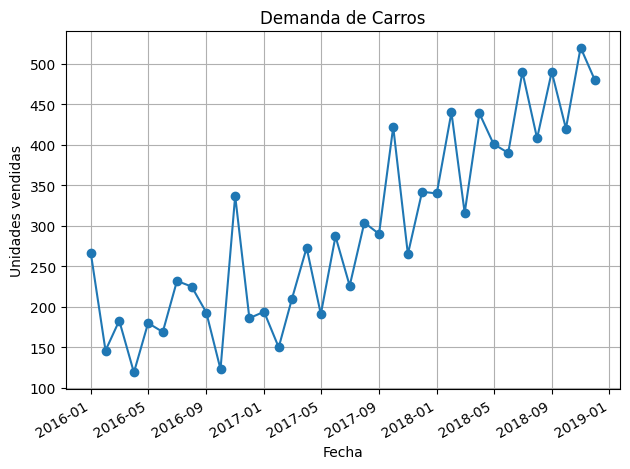

In [5]:
#Se realiza el gráfico de los datos
plt.plot_date(df.iloc[:, 0], df.iloc[:, 1], linestyle = 'solid')
plt.gcf().autofmt_xdate()

plt.title("Demanda de Carros")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")

plt.tight_layout()
plt.grid()
plt.show()

## Pronósticos con Promedio Móvil Ponderado

### Promedio Móvil Ponderado

Utilizando el conocimiento adquirido en Pensamiento Algorítmico, es posible crear una función con bucles y condicionales para pronosticar usando el método del Promedio Móvil Ponderado a una columna de datos.

In [6]:
#Se realiza el código del promedio móvil ponderado manualmente

def Promedio_Movil_Ponderado(n, number_column):
  """
  Calcula el Promedio Móvil Ponderado tomando en cuenta
  los n valores anteriores.

  Args:
    n: Lista que indica los n valores de porcentajes anteriores
    tomados en cuenta para el pronóstico del término siguiente.
    number_column: Número de la columna seleccionada del dataframe.

  Returns:
    Weighted_Moving_Average: lista con los respectivos pronósticos.
  """

  S = 0
  for i in range(len(n)):
    S += n[i]

  if S == 1:
    Weighted_Moving_Average = []
    l = len(df.iloc[:, number_column])

    for i in range(l):
      sum = 0
      average = 0
      if i < len(n):
        Weighted_Moving_Average.append(np.nan)
      else:
        for j in range(len(n)):
          sum += n[j] * df.iloc[i - len(n) + j, number_column]
        average = sum
        Weighted_Moving_Average.append(average)

    return Weighted_Moving_Average

  else:
    print("La suma de los pesos no da 1.")


In [7]:
#Si los pesos no son iguales a 1 pasa lo siguiente
Promedio_Movil_Ponderado([0.5, 0.6], 1)

La suma de los pesos no da 1.


In [8]:
df.insert(loc = 2, column = "Promedio Móvil Ponderado (OPI Función)", value = Promedio_Movil_Ponderado([0.5, 0.3, 0.2], 1))
df

,Month,Sales,Promedio Móvil Ponderado (OPI Función)
0,2016-01-01,266.0,NaN
1,2016-02-01,146.0,NaN
2,2016-03-01,183.0,NaN
3,2016-04-01,119.0,213.4
4,2016-05-01,180.0,151.7
5,2016-06-01,169.0,163.2
6,2016-07-01,232.0,147.3
7,2016-08-01,225.0,187.1
8,2016-09-01,193.0,199.1
9,2016-10-01,123.0,222.1


### Promedio Móvil Ponderado con Funciones de Pandas

In [9]:
percentages = np.array([0.5,0.3,0.2])
df["Promedio Móvil Ponderado (Función de Pandas)"] = df["Sales"].shift(periods=1).rolling(3).apply(lambda x: np.sum(percentages*x))
df

,Month,Sales,Promedio Móvil Ponderado (OPI Función),Promedio Móvil Ponderado (Función de Pandas)
0,2016-01-01,266.0,NaN,NaN
1,2016-02-01,146.0,NaN,NaN
2,2016-03-01,183.0,NaN,NaN
3,2016-04-01,119.0,213.4,213.4
4,2016-05-01,180.0,151.7,151.7
5,2016-06-01,169.0,163.2,163.2
6,2016-07-01,232.0,147.3,147.3
7,2016-08-01,225.0,187.1,187.1
8,2016-09-01,193.0,199.1,199.1
9,2016-10-01,123.0,222.1,222.1


### Errores de Pronóstico

Para tener los errores, se comparan los valores reales de demanda con los valores pronosticados. De tal forma que se modela matemáticamente como,

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix} $$

$$ \mathrm{Error \: de \: Pronostico} = \begin{vmatrix}
D_{t} - F_{t}
\end{vmatrix} $$

In [10]:
# Se calculan los errores

def Errores(n, number_column, forecast_column):
  """
  Calcula los errores tomando en cuenta los n valores anteriores

  Args:
    n: Entero que indica los n valores anteriores tomados en cuenta
    para el pronóstico del término siguiente.
    number_column: Número de la columna seleccionada del dataframe.
    forecast_column: Número de la columna en la que se hizo el pronóstico.
  Returns:
    Errors: lista con los errores de los respectivos pronósticos.
  """

  Errors = []
  l = len(df.iloc[:, number_column])

  for i in range(l):
    if i < n:
      Errors.append(np.nan)
    else:
      Error = np.abs(df.iloc[i, number_column] - df.iloc[i, forecast_column])
      Errors.append(Error)

  return Errors

In [11]:
df.insert(loc = 4, column = "Errores (OPI Función)", value = Errores(3, 1, 2))
df

,Month,Sales,Promedio Móvil Ponderado (OPI Función),Promedio Móvil Ponderado (Función de Pandas),Errores (OPI Función)
0,2016-01-01,266.0,NaN,NaN,NaN
1,2016-02-01,146.0,NaN,NaN,NaN
2,2016-03-01,183.0,NaN,NaN,NaN
3,2016-04-01,119.0,213.4,213.4,94.4
4,2016-05-01,180.0,151.7,151.7,28.3
5,2016-06-01,169.0,163.2,163.2,5.8
6,2016-07-01,232.0,147.3,147.3,84.7
7,2016-08-01,225.0,187.1,187.1,37.9
8,2016-09-01,193.0,199.1,199.1,6.1
9,2016-10-01,123.0,222.1,222.1,99.1


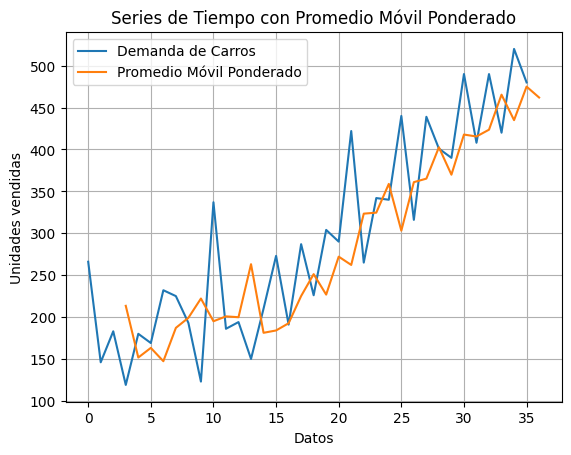

In [12]:
#Graficamos varios de los resultados
plt.plot(df.iloc[:, 1], label = 'Demanda de Carros')
plt.plot(df.iloc[:, 2], label = 'Promedio Móvil Ponderado')
plt.grid()
plt.legend(loc = 'best')
plt.title('Series de Tiempo con Promedio Móvil Ponderado')
plt.xlabel("Datos")
plt.ylabel("Unidades vendidas")
plt.show()

### MAD

Una medida muy importante utilizada para medir el error global de un tipo de pronóstico es el MAD, el cual es el promedio de los errores. Matemáticamente se define así:

$$ \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

In [13]:
#Para calcular el MAD
def MAD_Promedio_Movil_Ponderado(n):
  """
  Calcula el MAD del Promedio Móvil Ponderado tomando en cuenta
  los n valores anteriores

  Args:
    n: Lista que indica los n valores de porcentajes anteriores
    tomados en cuenta para el pronóstico del término siguiente.

  Returns:
    MAD: Número float con la desviación absoluta media (MAD).
  """

  Weighted_Moving_Average = []
  l = len(df.iloc[:, 1])

  for i in range(l):
    sum = 0
    average = 0
    if i < len(n):
      Weighted_Moving_Average.append(np.nan)
    else:
      for j in range(len(n)):
        sum += n[j] * df.iloc[i - len(n) + j, 1]
      average = sum
      Weighted_Moving_Average.append(average)

  Errors = []
  l = len(df.iloc[:, 1])

  for i in range(l):
    if i < len(n):
      Errors.append(np.nan)
    else:
      Error = np.abs(df.iloc[i, 1] - Weighted_Moving_Average[i])
      Errors.append(Error)

  sum = 0
  total = l - len(n) - 1

  for i in range(len(n), l - 1):
    sum += Errors[i]

  mad = sum / total

  return mad

In [14]:
#Calculamos el MAD
MAD_Promedio_Movil_Ponderado([0.5, 0.3, 0.2])

52.93939393939395

In [15]:
#Otra forma de calcular MAD
n = 3
mad = np.mean(np.abs(df["Sales"][n:-1]-df["Promedio Móvil Ponderado (OPI Función)"][n:-1]))
mad

52.93939393939394

### Optimización de los pesos

Ahora bien, haciéndo uso de los conocimientos de Analítica I y Matemáticas Aplicadas I, se puede minimizar la función objetivo MAD para obtener el mínimo error.

$ \mathbf{f.o.} $
$$ \mathit{min} \: \: \mathrm{MAD} = \frac{\sum \begin{vmatrix}
\mathrm{Demanda \: Real} - \mathrm{Valor \: Pronosticado}
\end{vmatrix}}{n} $$

$ \mathbf{s.a.} $
$$ n <  N $$
$$ \alpha + \beta + \gamma = 1 $$
donde,

$ N = \mathrm{Total \: de \: datos} $

$ \alpha = \mathrm{Ponderacion} \: t-1 $

$ \beta = \mathrm{Ponderacion} \: t-2 $

$ \gamma = \mathrm{Ponderacion} \: t-3 $

In [16]:
#Ahora se realizará la optimización de los pesos.

from scipy import optimize

weights = [0.5, 0.3, 0.2]

def C1(weights):
  'Restricción de igualdad'
  x, y, z, = weights
  return x + y + z - 1

constraint1 = [{'type':'eq','fun': C1}]
bnds = [(0.0, 1.0)]

result = optimize.minimize(MAD_Promedio_Movil_Ponderado, weights, constraints = constraint1, bounds = bnds, method = 'SLSQP')
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 48.76905336549106
       x: [ 3.550e-01  5.047e-01  1.402e-01]
     nit: 11
     jac: [-8.009e+01 -7.664e+01 -7.991e+01]
    nfev: 71
    njev: 11

In [17]:
#Peso hace 3 iteraciones (t - 3)
a = result.x[0]
print(a)

0.3550482829403731


In [18]:
#Peso hace 2 iteraciones (t - 2)
b = result.x[1]
print(b)

0.5047134329522922


In [19]:
#Peso hace 1 iteracioón (t - 1)
c = result.x[2]
print(c)

0.14023828410733474


In [20]:
# Se cumple la restricción
restricción = a + b + c
restricción

1.0

In [21]:
#MAD resultante
Optimized_MAD = result.fun
print(Optimized_MAD)

48.76905336549106


### Referencias
*   Heizer, J., & Render, B. (2004). Principios de administración de operaciones.
*   Lind, D. A., Marchal, W. G., & Wathen, S. A. (2005). Estadística aplicada a los negocios y a la economía.